In [186]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')




# coffe score


flight_delay_data=pd.read_csv('data/Train.csv')

In [188]:
flight_delay_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-null  object 
 2   FLTID   107833 non-null  object 
 3   DEPSTN  107833 non-null  object 
 4   ARRSTN  107833 non-null  object 
 5   STD     107833 non-null  object 
 6   STA     107833 non-null  object 
 7   STATUS  107833 non-null  object 
 8   AC      107833 non-null  object 
 9   target  107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


In [189]:
flight_delay_data.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [169]:
flight_delay_data['FLTID'].nunique()


1861

In [170]:
flight_delay_data.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


ç

In [171]:
flight_delay_data['ARRSTN'].unique()

array(['TUN', 'IST', 'NTE', 'ALG', 'BCN', 'ORY', 'FCO', 'NCE', 'MRS',
       'MED', 'FRA', 'BRU', 'DJE', 'LYS', 'CMN', 'BEG', 'OUA', 'GVA',
       'MXP', 'BEY', 'MAD', 'JED', 'ABJ', 'VIE', 'MLA', 'BLQ', 'SFA',
       'LIS', 'LHR', 'CDG', 'MIR', 'CAI', 'DUS', 'HAM', 'NBE', 'ZRH',
       'AMS', 'NDR', 'TLS', 'VCE', 'SXB', 'MUC', 'LGW', 'CRL', 'ORN',
       'DKR', 'BOD', 'SXF', 'LJU', 'OST', 'NKC', 'BKO', 'TOE', 'AHU',
       'YUL', 'PRG', 'CPH', 'ARN', 'OUD', 'BRQ', 'GAF', 'JIB', 'BUD',
       'OPO', 'KGL', 'NIM', 'SVO', 'LIL', 'OSR', 'EBL', 'TNG', 'PSA',
       'CGN', 'AYT', 'GAE', 'NAP', 'BJA', 'KRT', 'LFW', 'TBJ', 'PMO',
       'TMR', 'FBM', 'RAK', 'GNB', 'ESB', 'CZL', 'LBV', 'KSC', 'CKY',
       'AMM', 'LED', 'BTS', 'MVB', 'HBE', 'OTP', 'CAG', 'VNO', 'TRN',
       'ATH', 'ADB', 'SKG', 'BYJ', 'DSS', 'COO', 'IEV', 'LUX', 'KBP',
       'DOH', 'FIH', 'EBM', 'BDS', 'VKO', 'AAE', 'BLL', 'HAJ', 'BRI',
       'CTA', 'VRN', 'SKX', 'VOG', 'BGY', 'LAD', 'KRR', 'SJJ', 'GHA',
       'RTM', 'TPS']

In [172]:
flight_delay_data['ARRSTN'].value_counts()

ARRSTN
TUN    42572
DJE    10198
ORY     6755
MIR     5251
MRS     2845
       ...  
ESB        1
LBV        1
MVB        1
OTP        1
TPS        1
Name: count, Length: 128, dtype: int64

In [173]:
flight_delay_data['DEPSTN'].value_counts()

DEPSTN
TUN    42522
DJE    10252
ORY     6755
MIR     5248
MRS     2845
       ...  
ADB        1
SKG        1
OTP        1
KBP        1
CTA        1
Name: count, Length: 132, dtype: int64

# Data cleaningin and feature engineering

In [174]:
flight_delay_data.describe()

,target
count,107833.000000
mean,48.733013
std,117.135562
min,0.000000
25%,0.000000
50%,14.000000
75%,43.000000
max,3451.000000


<Axes: >

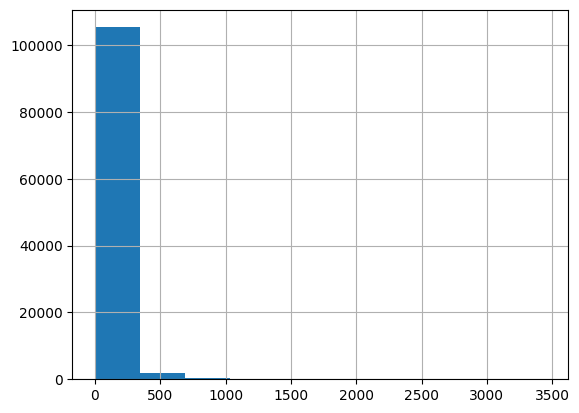

In [175]:
flight_delay_data['target'].hist()

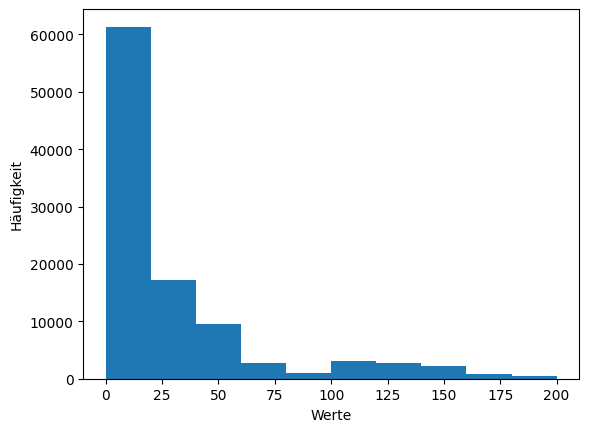

In [176]:
# Histogramm mit begrenztem Wertebereich
plt.hist(flight_delay_data['target'], range=(0, 200))

# Achsenbeschriftungen hinzufügen
plt.xlabel('Werte')
plt.ylabel('Häufigkeit')

# Anzeige des Histogramms
plt.show()

In [177]:
flight_delay_data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
107828    False
107829    False
107830    False
107831    False
107832    False
Length: 107833, dtype: bool

In [178]:
test = flight_delay_data[['DEPSTN','target']].groupby('DEPSTN').mean()
test

,target
DEPSTN,
AAE,157.000000
AAL,0.000000
ABJ,77.801944
ADB,0.000000
AHU,35.660000
...,...
VNO,1.000000
VOG,328.000000
VRN,46.925926


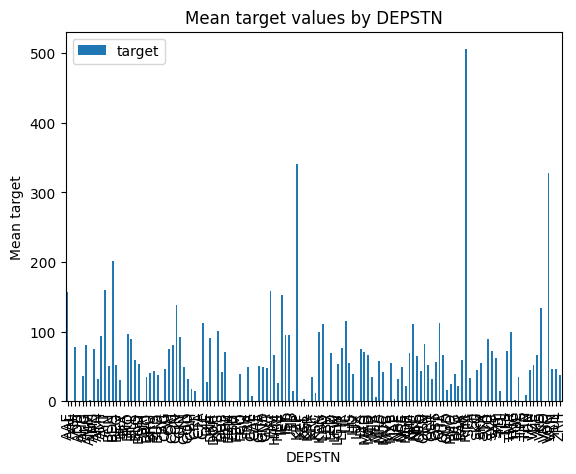

In [179]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouped mean values
test = flight_delay_data[['DEPSTN', 'target']].groupby('DEPSTN').mean()

# Bar plot
test.plot(kind='bar')

# Customize the plot
plt.xlabel('DEPSTN')
plt.ylabel('Mean target')
plt.title('Mean target values by DEPSTN')

# Display the plot
plt.show()


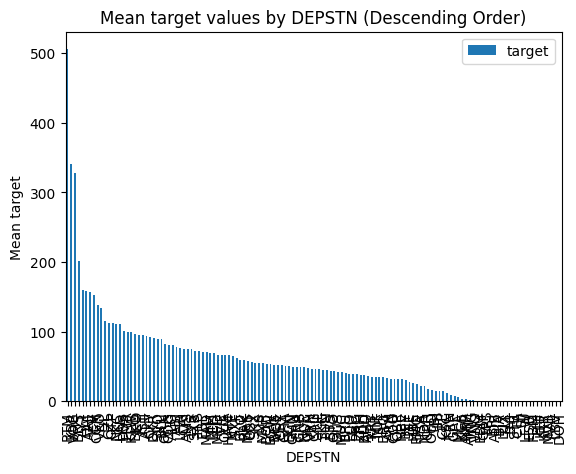

In [180]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouped mean values
test = flight_delay_data[['DEPSTN', 'target']].groupby('DEPSTN').mean()

# Sortieren der Werte in absteigender Reihenfolge
test_sorted = test.sort_values(by='target', ascending=False)

# Bar-Plot in absteigender Reihenfolge der Mittelwerte
test_sorted.plot(kind='bar')

# Anpassung des Plots
plt.xlabel('DEPSTN')
plt.ylabel('Mean target')
plt.title('Mean target values by DEPSTN (Descending Order)')

# Anzeige des Plots
plt.show()


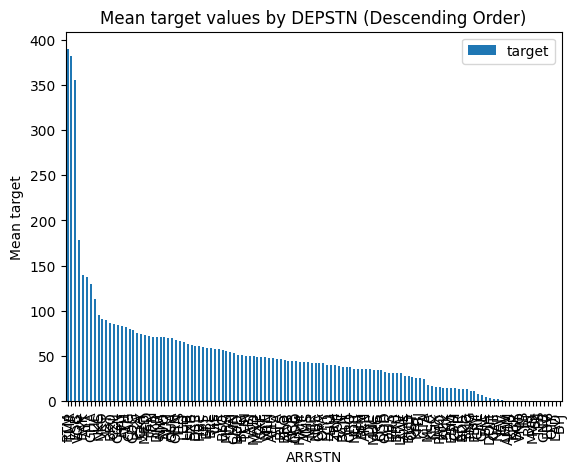

In [181]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouped mean values
test = flight_delay_data[['ARRSTN', 'target']].groupby('ARRSTN').mean()

# Sortieren der Werte in absteigender Reihenfolge
test_sorted = test.sort_values(by='target', ascending=False)

# Bar-Plot in absteigender Reihenfolge der Mittelwerte
test_sorted.plot(kind='bar')

# Anpassung des Plots
plt.xlabel('ARRSTN')
plt.ylabel('Mean target')
plt.title('Mean target values by DEPSTN (Descending Order)')

# Anzeige des Plots
plt.show()

In [182]:
flight_delay_data.groupby('DEPSTN').value_counts()

DEPSTN  ID              DATOP       FLTID     ARRSTN  STD                  STA                  STATUS  AC         target
AAE     train_id_77004  2018-05-10  TU 2611   TUN     2018-05-10 16:15:00  2018-05-10 17.05.00  ATA     TU 32AIMH  157.0     1
AAL     train_id_76737  2018-06-03  TU 9095   DJE     2018-06-03 17:00:00  2018-06-03 20.45.00  ATA     GJ 733EWE  0.0       1
ABJ     train_id_41665  2017-01-04  TU 0399   NIM     2017-01-04 22:40:00  2017-01-05 00.40.00  ATA     TU 320IMV  31.0      1
        train_id_44184  2017-04-27  TU 0397   TUN     2017-04-27 22:40:00  2017-04-28 03.50.00  ATA     TU 320IMU  0.0       1
        train_id_44138  2017-04-20  TU 0397   TUN     2017-04-20 22:40:00  2017-04-21 03.50.00  ATA     TU 320IMV  57.0      1
                                                                                                                            ..
ZRH     train_id_27075  2016-09-20  TU 0603   TUN     2016-09-20 09:10:00  2016-09-20 11.20.00  ATA     TU 736IOR  0

In [183]:
flight_delay_data['flight_delay_data'] = pd.to_datetime(flight_delay_data['DATOP'])

# Extrahiere den Monat und weise ihn der neuen Spalte "month" zu
flight_delay_data['month'] = flight_delay_data['flight_delay_data'].dt.month

In [184]:
flight_delay_data['month'].value_counts()

month
8     13208
7     12226
6      9764
4      9621
10     9466
3      8994
12     8822
1      8640
11     7726
9      7417
5      6786
2      5163
Name: count, dtype: int64

In [185]:
flight_delay_data['delay'] = flight_delay_data['tag'].dt.month

KeyError: 'tag'

<Axes: xlabel='month'>

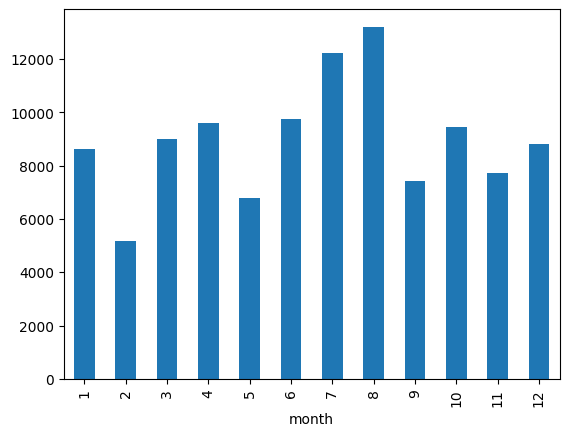

In [ ]:
flight_delay_data['month'].value_counts().sort_index().plot(kind="bar")


In [ ]:
flight_delay_data['delay'] = 0
flight_delay_data.head(2)

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,flight_delay_data,month,delay
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,2016-01-03,1,0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,2016-01-13,1,0


In [194]:
import pandas as pd



# Verwendung von replace(), um die Spalte "delay" basierend auf "target" zu setzen
flight_delay_data['delay'] = np.where(flight_delay_data['target'] > 15, 1, 0)


# Anzeige des aktualisierten DataFrame
flight_delay_data.head(2)


,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,delay
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,1
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,1


In [ ]:
flight_delay_data['STD_day'] = flight_delay_data['STD'].dt.dayofweek + 1  # +1 to make it 1-7 instead of 0-6
flight_delay_data['STA_day'] = flight_delay_data['STA'].dt.dayofweek + 1  # +1 to make it 1-7 instead of 0-6

flight_delay_data['STD_hour'] = flight_delay_data['STD'].dt.hour + 1  # +1 to make it 1-24 instead of 0-23
flight_delay_data['STA_hour'] = flight_delay_data['STA'].dt.hour + 1  # +1 to make it 1-24 instead of 0-23


AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
print(flight_delay_data['STD'].dtypes)
print(flight_delay_data['STA'].dtypes)


object
object


In [ ]:
# Check for NaNs in 'STD' and 'STA' columns
print(flight_delay_data['STD'].isnull().sum())
print(flight_delay_data['STA'].isnull().sum())

# Drop rows with NaNs in 'STD' and 'STA' columns
flight_delay_data = flight_delay_data.dropna(subset=['STD', 'STA'])

# Now you can replace '.' with ':' and convert to datetime
flight_delay_data['STD'] = flight_delay_data['STD'].str.replace('.', ':')
flight_delay_data['STA'] = flight_delay_data['STA'].str.replace('.', ':')

flight_delay_data['STD'] = pd.to_datetime(flight_delay_data['STD'])
flight_delay_data['STA'] = pd.to_datetime(flight_delay_data['STA'])

flight_delay_data['STD_day'] = flight_delay_data['STD'].dt.dayofweek + 1
flight_delay_data['STA_day'] = flight_delay_data['STA'].dt.dayofweek + 1

flight_delay_data['STD_hour'] = flight_delay_data['STD'].dt.hour + 1
flight_delay_data['STA_hour'] = flight_delay_data['STA'].dt.hour + 1



0
0


AttributeError: Can only use .str accessor with string values!

In [ ]:
flight_delay_data[flight_delay_data['delay'] == 1].count()

ID                   50329
DATOP                50329
FLTID                50329
DEPSTN               50329
ARRSTN               50329
STD                  50329
STA                  50329
STATUS               50329
AC                   50329
target               50329
flight_delay_data    50329
month                50329
delay                50329
dtype: int64

In [ ]:
50000/108000

0.46296296296296297

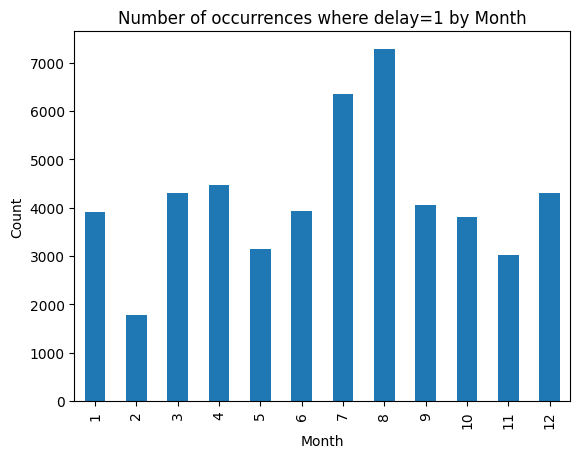

In [ ]:
# Anzahl der Zeilen mit delay=1 zählen und Balkendiagramm erstellen
flight_delay_data[flight_delay_data['delay'] == 1]['month'].value_counts().sort_index().plot(kind="bar")

# Achsenbeschriftungen hinzufügen
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of occurrences where delay=1 by Month')

# Anzeige des Plots
plt.show()

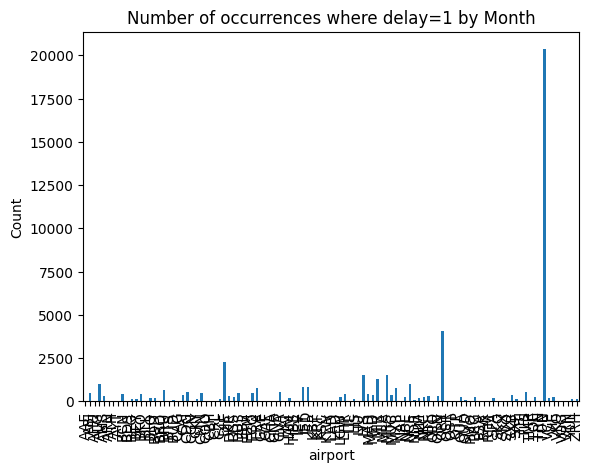

In [ ]:
# Anzahl der Zeilen mit delay=1 zählen und Balkendiagramm erstellen
flight_delay_data[flight_delay_data['delay'] == 1]['DEPSTN'].value_counts().sort_index().plot(kind="bar")

# Achsenbeschriftungen hinzufügen
plt.xlabel('airport')
plt.ylabel('Count')
plt.title('Number of occurrences where delay=1 by Month')

# Anzeige des Plots
plt.show()

In [199]:
# make a new column "cursed" (1 or 0), ['DEPSTN]== TUN
flight_delay_data['cursed']= flight_delay_data[flight_delay_data['DEPSTN'] == "TUBN"]

In [218]:
airports = ["TUN", "DJE", "MIR"]

flight_delay_data['cursed'] = np.where(flight_delay_data['DEPSTN'].isin(airports), 1, 0)

In [219]:
flight_delay_data.head(20)

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,delay,cursed,cursed1
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,1,0,0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,1,0,0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,0,1,1
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,0,1,0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,1,1,1
5,train_id_5,2016-01-17,TU 0283,TLS,TUN,2016-01-17 16:20:00,2016-01-17 18.15.00,ATA,TU 736IOP,53.0,1,0,0
6,train_id_6,2016-01-18,TU 0514,TUN,BCN,2016-01-18 07:15:00,2016-01-18 09.00.00,ATA,TU 32AIMH,10.0,0,1,1
7,train_id_7,2016-01-18,TU 0716,TUN,ORY,2016-01-18 07:35:00,2016-01-18 09.55.00,ATA,TU 32AIMI,15.0,0,1,1
8,train_id_8,2016-01-18,TU 0752,TUN,FCO,2016-01-18 07:40:00,2016-01-18 09.00.00,ATA,TU 32AIMC,16.0,1,1,1
9,train_id_9,2016-01-18,TU 0996,TUN,NCE,2016-01-18 07:45:00,2016-01-18 09.15.00,ATA,TU 31AIMK,21.0,1,1,1


In [209]:
flight_delay_data['cursed1'] = np.where((flight_delay_data['DEPSTN'] == "TUN") | (flight_delay_data['ARRST'] == "TUN"), 1, 0)


In [212]:

flight_delay_data['cursed1'] = np.where(flight_delay_data['DEPSTN'] == "TUN" , 1, 0)

In [ ]:
flight_delay_data[flight_delay_data['delay'] == 1]['DEPSTN'].value_counts().sort_values(ascending=False).head(50)

DEPSTN
TUN    20345
ORY     4056
DJE     2286
MRS     1540
LYS     1509
MIR     1303
ALG     1038
NCE     1037
JED      865
IST      853
MXP      789
FRA      766
BRU      688
TLS      565
GVA      546
CDG      533
ABJ      509
CMN      506
FCO      465
DUS      462
BCN      450
MAD      429
BKO      414
LHR      411
CAI      389
MUC      388
MED      387
SXB      376
ORN      320
AMS      318
DKR      314
NTE      312
VIE      283
OUA      280
DSS      276
LGW      259
PRG      258
NKC      241
NBE      240
TOE      234
SFA      215
BOD      208
VCE      207
BLQ      205
NIM      194
HAM      193
CZL      166
LIS      165
SXF      162
BEY      159
Name: count, dtype: int64

In [ ]:
flight_delay_data[flight_delay_data['delay'] == 0]['DEPSTN'].value_counts().sort_values(ascending=False).head(50)


DEPSTN
TUN    22177
DJE     7966
MIR     3945
ORY     2699
MRS     1305
NCE     1190
TOE      969
LYS      849
CMN      843
FCO      801
MXP      745
SFA      702
BRU      685
NBE      678
CDG      620
FRA      612
IST      589
GVA      568
PRG      539
ALG      535
MED      399
DUS      369
MUC      360
MLA      329
ABJ      314
TLS      285
JED      273
BCN      273
BEY      257
VIE      245
NAP      243
NTE      228
ZRH      227
BLQ      226
VCE      224
SXB      193
NDR      191
LHR      172
SXF      170
BOD      168
CAI      165
OUA      158
LIS      158
MAD      150
ORN      150
GAF      149
GAE      146
HAM      144
NIM      137
LGW      126
Name: count, dtype: int64

In [ ]:
delayed_airports = flight_delay_data[flight_delay_data['delay'] == 1]['DEPSTN'].value_counts().sort_values(ascending=False)
delayed_airports.head(5)

DEPSTN
TUN    20345
ORY     4056
DJE     2286
MRS     1540
LYS     1509
Name: count, dtype: int64

In [ ]:
delayed_airports = flight_delay_data[flight_delay_data['delay'] == 0]['DEPSTN'].value_counts().sort_values(ascending=False)
delayed_airports.head(5)

DEPSTN
TUN    22177
DJE     7966
MIR     3945
ORY     2699
MRS     1305
Name: count, dtype: int64

In [ ]:
# Flughäfen mit Verspätungen
delayed_airports = flight_delay_data[flight_delay_data['delay'] == 1]['DEPSTN'].value_counts().sort_values(ascending=False)

# Flughäfen ohne Verspätungen
non_delayed_airports = flight_delay_data[flight_delay_data['delay'] == 0]['DEPSTN'].value_counts().sort_values(ascending=False)

# Berechnung des Verhältnisses
ratio = delayed_airports / (delayed_airports + non_delayed_airports)

# Hinzufügen der neuen Spalte "ratio" zum DataFrame
flight_delay_data['ratio'] = flight_delay_data['DEPSTN'].map(ratio)


In [ ]:
flight_delay_data = flight_delay_data.dropna(subset=['ratio'])


In [ ]:
nan_rows = flight_delay_data[flight_delay_data['ratio'].isna()]
nan_rows

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,flight_delay_data,month,delay,ratio
345,train_id_345,2016-01-16,TU 6180,KGL,TUN,2016-01-16 15:00:00,2016-01-16 22.10.00,ATA,TU 320IMV,6.0,2016-01-16,1,0,NaN
1786,train_id_1786,2016-07-18,AT 0682,TNG,BRU,2016-07-18 15:25:00,2016-07-18 18.15.00,ATA,TU 32AIMM,0.0,2016-07-18,7,0,NaN
3287,train_id_3287,2016-09-03,TU 0614,TMR,TUN,2016-09-03 10:40:00,2016-09-03 12.40.00,ATA,TU 320IMU,100.0,2016-09-03,9,1,NaN
3590,train_id_3590,2016-06-27,AT 0686,TNG,AMS,2016-06-27 15:05:00,2016-06-27 18.05.00,ATA,TU 32AIMM,6.0,2016-06-27,6,0,NaN
3898,train_id_3898,2016-06-03,TU 8272,JIB,TUN,2016-06-03 17:00:00,2016-06-03 23.35.00,ATA,TU 320IMT,14.0,2016-06-03,6,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105570,train_id_105570,2018-07-12,UG 1601,SJJ,TUN,2018-07-12 09:20:00,2018-07-12 11.20.00,SCH,TU CR9ISA,0.0,2018-07-12,7,0,NaN
106015,train_id_106015,2018-07-23,UG 1601,SJJ,TUN,2018-07-23 09:20:00,2018-07-23 11.20.00,SCH,TU CR9ISA,0.0,2018-07-23,7,0,NaN
106596,train_id_106596,2018-08-13,UG 1601,SJJ,TUN,2018-08-13 09:20:00,2018-08-13 11.20.00,SCH,TU CR9ISA,0.0,2018-08-13,8,0,NaN
107308,train_id_107308,2018-06-18,UG 1601,SJJ,TUN,2018-06-18 09:20:00,2018-06-18 11.20.00,SCH,TU CR9ISA,0.0,2018-06-18,6,0,NaN


In [ ]:
flight_delay_data['ratio'].isna()


0         False
1         False
2         False
3         False
4         False
          ...  
107828    False
107829    False
107830    False
107831    False
107832    False
Name: ratio, Length: 107833, dtype: bool

In [ ]:
sorted_data = flight_delay_data.loc[flight_delay_data['delay'] == 1].sort_values('ratio', ascending=False)
sorted_data[['DEPSTN', 'ratio']].head(10)


,DEPSTN,ratio
12535,AYT,0.875
51810,AYT,0.875
48796,AYT,0.875
7458,AYT,0.875
59190,AYT,0.875
87540,BLL,0.875
80030,BLL,0.875
63006,AYT,0.875
9351,AYT,0.875
53953,AYT,0.875


In [ ]:
sorted_data = flight_delay_data[flight_delay_data['delay'] == 1]['DEPSTN'].value_counts().sort_values(ascending=False)
sorted_data


DEPSTN
TUN    20345
ORY     4056
DJE     2286
MRS     1540
LYS     1509
       ...  
GHA        1
KTW        1
PSA        1
KBP        1
EBM        1
Name: count, Length: 107, dtype: int64

In [ ]:
sorted_data = flight_delay_data[flight_delay_data['delay'] == 1].groupby('DEPSTN').agg({'ratio': 'first', 'delay': 'count'}).sort_values('delay', ascending=False)
sorted_data.head(15)



,ratio,delay
DEPSTN,,
TUN,0.478458,20345
ORY,0.600444,4056
DJE,0.222981,2286
MRS,0.541301,1540
LYS,0.639949,1509
MIR,0.248285,1303
ALG,0.659886,1038
NCE,0.465649,1037
JED,0.760105,865


In [ ]:
flight_delay_data[(flight_delay_data['delay'] == 1) & (flight_delay_data['DEPSTN'] == "TUN")]['ARRSTN'].unique()


array(['ALG', 'FCO', 'NCE', 'ORY', 'FRA', 'MED', 'DJE', 'CMN', 'MRS',
       'LYS', 'GVA', 'BEG', 'MLA', 'SFA', 'JED', 'CAI', 'ABJ', 'BCN',
       'HAM', 'BRU', 'NDR', 'MXP', 'VCE', 'SXB', 'IST', 'MUC', 'ORN',
       'VIE', 'BLQ', 'LHR', 'BOD', 'TUN', 'CDG', 'BEY', 'TLS', 'DUS',
       'NKC', 'BKO', 'MIR', 'NTE', 'TOE', 'LIS', 'OUA', 'MAD', 'AMS',
       'YUL', 'DKR', 'NIM', 'SVO', 'LGW', 'LIL', 'EBL', 'ZRH', 'CGN',
       'AYT', 'SXF', 'NAP', 'CPH', 'KRT', 'OST', 'PRG', 'ARN', 'TBJ',
       'NBE', 'GAE', 'OUD', 'PMO', 'ESB', 'CZL', 'CKY', 'BTS', 'HBE',
       'DSS', 'COO', 'BUD', 'FIH', 'CAG', 'EBM', 'VKO', 'AAE', 'CTA',
       'BRQ', 'OPO', 'VOG', 'RTM'], dtype=object)

In [ ]:
flight_delay_data[(flight_delay_data['delay'] == 1) & (flight_delay_data['DEPSTN'] == "TUN")]['ARRSTN'].value_counts().head(15)


ARRSTN
ORY    2825
MRS    1383
ALG    1026
IST     916
LYS     841
NCE     798
MXP     761
CMN     713
JED     644
TLS     564
FCO     515
GVA     497
DJE     477
FRA     397
MED     392
Name: count, dtype: int64

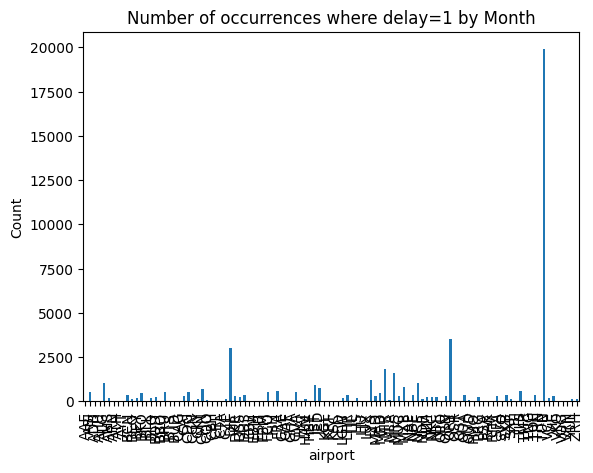

In [ ]:
# Anzahl der Zeilen mit delay=1 zählen und Balkendiagramm erstellen
flight_delay_data[flight_delay_data['delay'] == 1]['ARRSTN'].value_counts().sort_index().plot(kind="bar")

# Achsenbeschriftungen hinzufügen
plt.xlabel('airport')
plt.ylabel('Count')
plt.title('Number of occurrences where delay=1 by Month')

# Anzeige des Plots
plt.show()

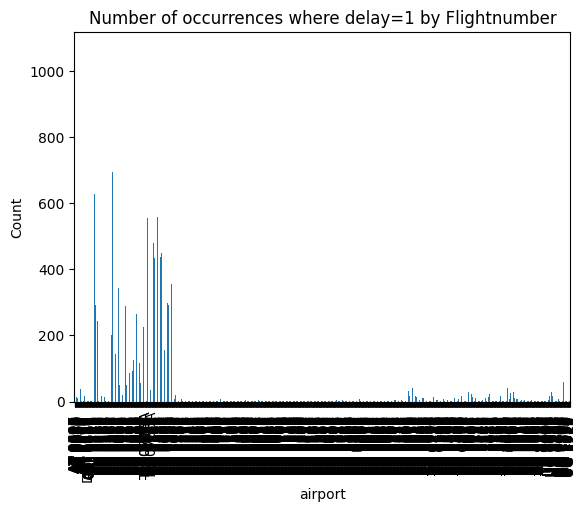

In [ ]:
# Anzahl der Zeilen mit delay=1 zählen und Balkendiagramm erstellen
flight_delay_data[flight_delay_data['delay'] == 1]['FLTID'].value_counts().sort_index().plot(kind="bar")

# Achsenbeschriftungen hinzufügen
plt.xlabel('airport')
plt.ylabel('Count')
plt.title('Number of occurrences where delay=1 by Flightnumber')

# Anzeige des Plots
plt.show()

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Assume df is your DataFrame
df = flight_delay_data

# Select feature columns
feature_cols = ['month', 'ratio']
#feature_cols = ['month']

# Create X (features) and y (response)
X = df[feature_cols]
y = df['delay']

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate model
logreg = LogisticRegression()

# Fit model to training data
logreg.fit(X_train, y_train)

# Make predictions on test data
y_pred = logreg.predict(X_test)

# Compute and print Accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Print the Confusion Matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))



Accuracy:  0.6017669549723449
Confusion Matrix: 
 [[11175  3136]
 [ 7592  5036]]


In [216]:
flight_delay_data.head(20)

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,delay,cursed,cursed1
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,1,0,0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,1,0,0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,0,1,1
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,0,1,0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,1,1,1
5,train_id_5,2016-01-17,TU 0283,TLS,TUN,2016-01-17 16:20:00,2016-01-17 18.15.00,ATA,TU 736IOP,53.0,1,0,0
6,train_id_6,2016-01-18,TU 0514,TUN,BCN,2016-01-18 07:15:00,2016-01-18 09.00.00,ATA,TU 32AIMH,10.0,0,1,1
7,train_id_7,2016-01-18,TU 0716,TUN,ORY,2016-01-18 07:35:00,2016-01-18 09.55.00,ATA,TU 32AIMI,15.0,0,1,1
8,train_id_8,2016-01-18,TU 0752,TUN,FCO,2016-01-18 07:40:00,2016-01-18 09.00.00,ATA,TU 32AIMC,16.0,1,1,1
9,train_id_9,2016-01-18,TU 0996,TUN,NCE,2016-01-18 07:45:00,2016-01-18 09.15.00,ATA,TU 31AIMK,21.0,1,1,1


In [220]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Assume df is your DataFrame
df = flight_delay_data

# Select feature columns
#feature_cols = ['month', 'ratio']
#feature_cols = ['month']
feature_cols = ['cursed']

# Create X (features) and y (response)
X = df[feature_cols]
y = df['delay']

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate model
logreg = LogisticRegression()

# Fit model to training data
logreg.fit(X_train, y_train)

# Make predictions on test data
y_pred = logreg.predict(X_test)

# Compute and print Accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Print the Confusion Matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy:  0.5591082755295078
Confusion Matrix: 
 [[8560 5855]
 [6031 6513]]


In [192]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Assume df is your DataFrame
df = flight_delay_data

# Convert categorical variables into numerical using one-hot encoding
#cat_features = ['FLTID', 'DEPSTN', 'ARRSTN', 'STATUS']
cat_features = ['DEPSTN', 'ARRSTN']
df = pd.get_dummies(df, columns = cat_features)
#df = df.astype(int)

# Select feature columns
#feature_cols = ['month', 'ratio']
feature_cols = cat_features
#feature_cols = ['month']

# Create X (features) and y (response)
X = df[feature_cols]
y = df['delay']

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate model
logreg = LogisticRegression()

# Fit model to training data
logreg.fit(X_train, y_train)

# Make predictions on test data
y_pred = logreg.predict(X_test)

# Compute and print Accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Print the Confusion Matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

KeyError: "None of [Index(['DEPSTN'], dtype='object')] are in the [columns]"

In [223]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Assume df is your DataFrame
df = flight_delay_data

# Convert categorical variables into numerical using one-hot encoding
cat_features = ['DEPSTN', 'ARRSTN']
df = pd.get_dummies(df, columns = cat_features)

# Get a list of all the one-hot-encoded columns
one_hot_cols = [col for col in df.columns if 'DEPSTN' in col or 'ARRSTN' in col]

# Select feature columns
feature_cols = one_hot_cols

# Create X (features) and y (response)
X = df[feature_cols]
y = df['delay']

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

# Instantiate model
logreg = LogisticRegression(max_iter=1000) # Increase max_iter if the model doesn't converge

# Fit model to training data
logreg.fit(X_train, y_train)

# Make predictions on test data
y_pred = logreg.predict(X_test)

# Compute and print Accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Print the Confusion Matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))


Accuracy:  0.6696805304400241
Confusion Matrix: 
 [[7189 4314]
 [2810 7254]]


In [231]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Assume df is your DataFrame
df = flight_delay_data

# Convert categorical variables into numerical using one-hot encoding
cat_features = ['DEPSTN', 'ARRSTN']
df = pd.get_dummies(df, columns = cat_features)

# Get a list of all the one-hot-encoded columns
one_hot_cols = [col for col in df.columns if 'DEPSTN' in col or 'ARRSTN' in col]

# Select feature columns
feature_cols = one_hot_cols

# Create X (features) and y (response)
X = df[feature_cols]
y = df['delay']

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

# Instantiate model
dec_tree = DecisionTreeClassifier() # Increase max_iter if the model doesn't converge

# Fit model to training data
dec_tree.fit(X_train, y_train)

# Make predictions on test data
y_pred = dec_tree.predict(X_test)

# Compute and print Accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Print the Confusion Matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy:  0.6770992720359809
Confusion Matrix: 
 [[6998 4505]
 [2459 7605]]


Accuracy:  0.6774702091157787
Confusion Matrix: 
 [[6984 4519]
 [2437 7627]]

In [232]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Assume df is your DataFrame
df = flight_delay_data

# Convert categorical variables into numerical using one-hot encoding
cat_features = ['DEPSTN', 'ARRSTN']
df = pd.get_dummies(df, columns = cat_features)

# Get a list of all the one-hot-encoded columns
one_hot_cols = [col for col in df.columns if 'DEPSTN' in col or 'ARRSTN' in col]

# Select feature columns
feature_cols = one_hot_cols

# Create X (features) and y (response)
X = df[feature_cols]
y = df['delay']

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

# Instantiate model
rf_forest = RandomForestClassifier() # Increase max_iter if the model doesn't converge

# Fit model to training data
rf_forest.fit(X_train, y_train)

# Make predictions on test data
y_pred = rf_forest.predict(X_test)

# Compute and print Accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Print the Confusion Matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy:  0.6774702091157787
Confusion Matrix: 
 [[6984 4519]
 [2437 7627]]


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assume df is your DataFrame
df = flight_delay_data

# Select feature columns
feature_cols = ['ratio']

# Create X (features) and y (response)
X = df[feature_cols]
y = df['target']

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate model
lr = LinearRegression()

# Fit model to training data
lr.fit(X_train, y_train)

# Make predictions on test data
y_pred = lr.predict(X_test)

# Compute and print RMSE
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))


RMSE:  116.82540173990319


In [ ]:
y_pred

array([46.12470742, 49.05850757, 51.99230771, ..., 49.7919576 ,
       51.25885767, 51.99230771])

## Splitting data for testing 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
#dropping Quakers column and unnamed
#changing one of the altitude to log and droping the original
X_train["altitude_mean_log"] = np.log(X_train["altitude_mean_meters"])
X_train.drop(['altitude_mean_meters'], axis=1, inplace=True)
X_train.drop(['Quakers'], axis=1, inplace=True)
X_train.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 17 to 6
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Number.of.Bags        22 non-null     int64  
 1   Harvest.Year          22 non-null     int64  
 2   Fragrance...Aroma     22 non-null     float64
 3   Flavor                22 non-null     float64
 4   Aftertaste            22 non-null     float64
 5   Salt...Acid           22 non-null     float64
 6   Bitter...Sweet        22 non-null     float64
 7   Mouthfeel             22 non-null     float64
 8   Uniform.Cup           22 non-null     float64
 9   Clean.Cup             22 non-null     float64
 10  Balance               22 non-null     float64
 11  Cupper.Points         22 non-null     float64
 12  Total.Cup.Points      22 non-null     float64
 13  Moisture              22 non-null     float64
 14  Category.One.Defects  22 non-null     int64  
 15  Category.Two.Defects  22 

In [ ]:
altitude_low_meters_mean = X_train["altitude_low_meters"].mean()
altitude_high_meters_mean = X_train["altitude_high_meters"].mean()
altitude_mean_log_mean = X_train["altitude_mean_log"].mean()

In [ ]:
# fillna with mean.. 
X_train["altitude_low_meters"] = X_train["altitude_low_meters"].fillna(altitude_low_meters_mean)
X_train["altitude_high_meters"] = X_train["altitude_high_meters"].fillna(altitude_high_meters_mean)
X_train["altitude_mean_log"] = X_train["altitude_mean_log"].fillna(altitude_mean_log_mean)

In [ ]:
print(f"altitude low meters mean is {altitude_low_meters_mean}")
print(f"altitude_high_meters_mean is {altitude_high_meters_mean}")
print(f"altitude_mean_log_mean is {altitude_mean_log_mean}")

altitude low meters mean is 1500.3684210526317
altitude_high_meters_mean is 1505.6315789473683
altitude_mean_log_mean is 7.0571530664031155


## Trainining the model

In [ ]:
## in order to exemplify how the predict will work.. we will save the y_train
X_test.to_csv("data/X_test.csv")
y_test.to_csv("data/y_test.csv")

In [ ]:
#training the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error
y_train_pred = reg.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
print(mse)

6.701014816713759e-28


In [ ]:
#dropping Quakers column and unnamed
#changing one of the altitude to log and droping the original
X_test["altitude_mean_log"] = np.log(X_test["altitude_mean_meters"])
X_test.drop(['altitude_mean_meters'], axis=1, inplace=True)
X_test.drop(['Quakers'], axis=1, inplace=True)
X_test.drop(['Unnamed: 0'], axis=1, inplace=True)
# fillna with mean.. 
X_test["altitude_low_meters"] = X_test["altitude_low_meters"].fillna(altitude_low_meters_mean)
X_test["altitude_high_meters"] = X_test["altitude_high_meters"].fillna(altitude_high_meters_mean)
X_test["altitude_mean_log"] = X_test["altitude_mean_log"].fillna(altitude_mean_log_mean)

In [ ]:
y_test_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print(mse)

2.08680004794465e-27
